# Stock Market Price prediction

In [ ]:
!pip install yfinance
#skip cell if yfinance is already installed 

In [2]:
#packages

import yfinance as yf
import pandas as pd
import pytz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

^C


ModuleNotFoundError: No module named 'yfinance'

## Downloading Symbol (sy) price data 

In [1]:
import yfinance as yf

In [2]:
sy= yf.Ticker("EURUSD=X")

In [3]:
sy= st.history(period= "10y")
#set period of data collected

In [4]:
#Show data
st

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-01-22 00:00:00+00:00,1.355748,1.358087,1.353541,1.355914,0,0.0,0.0
2014-01-23 00:00:00+00:00,1.354518,1.368551,1.353363,1.354224,0,0.0,0.0
2014-01-24 00:00:00+00:00,1.369000,1.373494,1.366494,1.368907,0,0.0,0.0
2014-01-27 00:00:00+00:00,1.368813,1.371499,1.365540,1.368794,0,0.0,0.0
2014-01-28 00:00:00+00:00,1.367596,1.368940,1.363180,1.367465,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-16 00:00:00+00:00,1.094571,1.094667,1.086708,1.094571,0,0.0,0.0
2024-01-17 00:00:00+00:00,1.087879,1.088495,1.084540,1.087879,0,0.0,0.0
2024-01-18 00:00:00+00:00,1.088578,1.090750,1.084869,1.088578,0,0.0,0.0


## Cleaning and visualising price data

In [5]:
del sy["Dividends"]
del sy["Stock Splits"]

In [ ]:
#localise timezone
sy.index.tz_localize("UTC").tz_convert("Africa/Harare")

<Axes: xlabel='Date'>

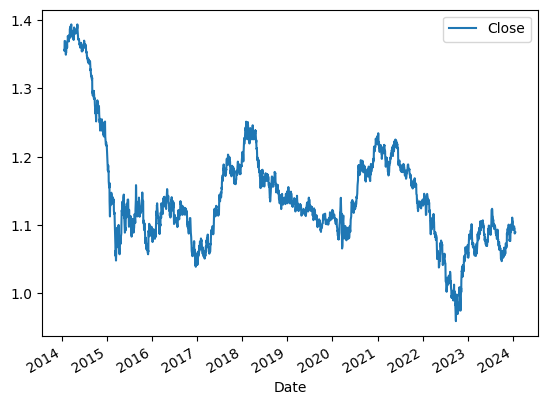

In [6]:
sy.plot.line(y="Close", use_index=True)

## Setting up Prediction

In [7]:
#creating a next day column and the closing price
sy["Next Day"]= st["Close"].shift(-1)

In [8]:
ins

,Open,High,Low,Close,Volume,Next Day
Date,,,,,,
2014-01-22 00:00:00+00:00,1.355748,1.358087,1.353541,1.355914,0,1.354224
2014-01-23 00:00:00+00:00,1.354518,1.368551,1.353363,1.354224,0,1.368907
2014-01-24 00:00:00+00:00,1.369000,1.373494,1.366494,1.368907,0,1.368794
2014-01-27 00:00:00+00:00,1.368813,1.371499,1.365540,1.368794,0,1.367465
2014-01-28 00:00:00+00:00,1.367596,1.368940,1.363180,1.367465,0,1.365505
...,...,...,...,...,...,...
2024-01-16 00:00:00+00:00,1.094571,1.094667,1.086708,1.094571,0,1.087879
2024-01-17 00:00:00+00:00,1.087879,1.088495,1.084540,1.087879,0,1.088578
2024-01-18 00:00:00+00:00,1.088578,1.090750,1.084869,1.088578,0,1.087914


In [9]:
sy["Target"] = (ins["Next Day"] >ins["Close"]).astype(int)

In [10]:
sy

,Open,High,Low,Close,Volume,Next Day,Target
Date,,,,,,,
2014-01-22 00:00:00+00:00,1.355748,1.358087,1.353541,1.355914,0,1.354224,0
2014-01-23 00:00:00+00:00,1.354518,1.368551,1.353363,1.354224,0,1.368907,1
2014-01-24 00:00:00+00:00,1.369000,1.373494,1.366494,1.368907,0,1.368794,0
2014-01-27 00:00:00+00:00,1.368813,1.371499,1.365540,1.368794,0,1.367465,0
2014-01-28 00:00:00+00:00,1.367596,1.368940,1.363180,1.367465,0,1.365505,0
...,...,...,...,...,...,...,...
2024-01-16 00:00:00+00:00,1.094571,1.094667,1.086708,1.094571,0,1.087879,0
2024-01-17 00:00:00+00:00,1.087879,1.088495,1.084540,1.087879,0,1.088578,1
2024-01-18 00:00:00+00:00,1.088578,1.090750,1.084869,1.088578,0,1.087914,0


### Target is if the price will go up or down on the next day. 
 1 means price will go up,  0 means price will go down.
 

## Building and training a model

In [11]:
#instatiate model
model= RandomForestClassifier(n_estimators= 100, min_samples_split=5, random_state=1)

#predictors/ feature matrix
X= ["Close", "Volume", "High", "Low"]
#target vector
y= ["Target"]

#train and test sets
X_train, X_test, y_train, y_test= train_test_split(X,y)

#train the model
model.fit(train[X], train[y])

RandomForestClassifier(min_samples_split=5, random_state=1)

## Evaluating the model

In [ ]:
preds= model.predict(test[X]) #  numpy array output of predictions.

In [13]:
preds= pd.Series(preds, index=test.index) #convert numpy array to series

In [14]:
precision_score(test[y], preds)

0.825

The precision score shows how accurately the model predicted that the price would go up on days that price did go up.

## Results

In [ ]:
pred_res= pd.concat([test[y], preds])

In [ ]:
pred_res.plot();

In [15]:
Res= pd.DataFrame(st[["Close", "Target"]])

In [16]:
Res["Prediction"]= preds.astype(int)

In [17]:
Res.tail()

,Open,Close,Target,Prediction
Date,,,,
2024-01-05 00:00:00+00:00,1.094739,1.094739,0,0.0
2024-01-08 00:00:00+00:00,1.094224,1.094224,1,1.0
2024-01-09 00:00:00+00:00,1.095170,1.095170,0,0.0
2024-01-10 00:00:00+00:00,1.093243,1.093243,1,1.0
2024-01-11 00:00:00+00:00,1.097514,1.097514,1,0.0
2024-01-12 00:00:00+00:00,1.098165,1.098165,0,0.0
2024-01-15 00:00:00+00:00,1.094571,1.094571,0,0.0
2024-01-16 00:00:00+00:00,1.094571,1.094571,0,0.0
2024-01-17 00:00:00+00:00,1.087879,1.087879,1,0.0
